# Project Objective

This notebook uses machine learning engineering, written in python language, to build models from different algorithms in the ScikitLearn library that will predict the scale formation (or not) in different oilfields. The models will eliminate the need for equations and correlations that are based on certain assumptions and do not capture significant underlying relationships. The model developed predicts scale formation with a high probability and likewise predict no scale formation with high certaintiy. It presents an effective way of monitoring scaling in an oilfield to make better proactive decisions. 


In [ ]:
# Import basic libraries for data wrangling, analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The data being used for model building in this research was collected from the following secondary data sources: Chike (2010), and Al-hajri et al. (2020). It includes measured properties from wells in different fields in the Niger Delta and other oil producing  regions outside Africa. The data set is available on an online spreadsheet compiled by me at https://drive.google.com/file/d/1k5JzxaNUQR314V37S47fjHOjmrazFI-i/view?usp=sharing


In [ ]:
# Load scale dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
scale_data = pd.read_excel('/content/gdrive/My Drive/Final_Year_Project/scale_data.xlsx')

In [ ]:
# Show data samples
scale_data.sample(15, random_state=12)

Well No  Temperature (oF)  ...  Inspection Result  Scale Type
374      104               NaN  ...              scale       CaCO3
287       89               NaN  ...              scale       CaCO3
152       56               NaN  ...              scale       CaCO3
392      107               NaN  ...              scale       CaCO3
14        15             130.0  ...           no scale       CaCO3
465      119               NaN  ...           no scale       CaCO3
275       85               NaN  ...              scale       CaCO3
290       89               NaN  ...              scale       CaCO3
268       83               NaN  ...              scale       CaCO3
0          1             120.0  ...           no scale       CaCO3
486      119               NaN  ...           no scale       CaCO3
306       93               NaN  ...              scale       CaCO3
206       65               NaN  ...              scale       CaCO3
270       84               NaN  ...              scale       CaCO3
504      124               NaN  ...           no scale       CaCO3

[15 rows x 17 columns]

The data set contains thermodynamic and compositional information about different wells indicated by the given well number and showing the result of inspection of well for scale or no scale. The sample shows that one well can appear more than once with different data values taken at different times during the life of the well. The occurence of scaling is indicated as 'scale' or 'no scale' in the `Inspection Result` column. The samples also show that there are a lot of missing values indicated as 'NaN', this is as a result of incomplete information since the data was sourced for from multiple sources.

Next, more information about the nature of the data set is obtained to enable better analysis of how the data set can be manipulated to build the best possible models. 

In [ ]:
scale_data.columns # to get column names

Index(['Well No', 'Temperature (oF)', 'Pressure (psia)', 'CO2 mole frac.',
       'pH', 'Ca2+ (ppm)', 'Na+ (ppm)', 'Mg2+ (ppm)', 'Fe2+ (ppm)',
       'HCO3- (ppm)', 'SO4 2-(ppm)', 'Cl- (ppm)', 'CO3 2- (ppm)', 'Ba2+ (ppm)',
       'TDS (ppm)', 'Inspection Result', 'Scale Type'],
      dtype='object')

In [ ]:
# Rename columns for easier manipulation
scale_data.rename(columns={'Temperature (oF)': 'T', 'Pressure (psia)':'P', 'CO2 mole frac.':'XCO2',
       'Ca2+ (ppm)':'Ca2+', 'Na+ (ppm)':'Na+', 'Mg2+ (ppm)':'Mg2+', 'Fe2+ (ppm)':'Fe2+',
       'HCO3- (ppm)':'HCO3-', 'SO4 2-(ppm)':'SO4 2-', 'Cl- (ppm)':'Cl-', 'CO3 2- (ppm)':'CO3 2-', 'Ba2+ (ppm)':'Ba2+',
       'TDS (ppm)':'TDS'}, inplace=True)

In [ ]:
# See information on data set
scale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Well No            541 non-null    int64  
 1   T                  36 non-null     float64
 2   P                  36 non-null     float64
 3   XCO2               31 non-null     float64
 4   pH                 535 non-null    float64
 5   Ca2+               541 non-null    float64
 6   Na+                540 non-null    float64
 7   Mg2+               540 non-null    float64
 8   Fe2+               30 non-null     float64
 9   HCO3-              541 non-null    float64
 10  SO4 2-             539 non-null    float64
 11  Cl-                35 non-null     float64
 12  CO3 2-             30 non-null     float64
 13  Ba2+               5 non-null      float64
 14  TDS                510 non-null    float64
 15  Inspection Result  541 non-null    object 
 16  Scale Type         540 non

The data set contains 541 entries, these will be refered to as instances going forward in this notebook. The dataframe has 17 columns, of which only 3 of the features (`Well no`, `Ca2+`, and `HCO3-`) and the target variable (`Inspection Result`) have no null instances. This is a result of compiling data from multiple sources where some sources do not contain certain variables. However, from the objective of this research, every feature is important for building a scale predicting model that performs efficiently on the field. In the data preprocessing stage, the null values will be handled in a way that allows the building of a robust machine learning model. The dataframe has 14 columns containing float values, 1 integer column and 2 object value columns, a total of 17 columns. These values will be handled accordingly.

Getting a statistical description on the numerical (float and integer) values and the categorical values (object) as well serves as guide in determining the best strategy for handling the null values in a way that maintains the models integrity

In [ ]:
# Get statistical  description for numerical values
scale_data.describe()



Well No           T  ...       Ba2+            TDS
count  541.000000   36.000000  ...   5.000000     510.000000
mean    80.323475  132.277778  ...  17.460000   93711.439216
std     32.493315   50.172469  ...   8.864705   44788.682017
min      1.000000   73.400000  ...   4.900000     228.000000
25%     53.000000   77.000000  ...  14.000000   62793.500000
50%     84.000000  130.000000  ...  18.000000   87518.500000
75%    110.000000  162.750000  ...  21.700000  116601.750000
max    130.000000  250.000000  ...  28.700000  236911.000000

[8 rows x 15 columns]

Most of the features do not show a normal distribution as their Standard deviations are far from zero , this implies that imputing mean values to fill the null values will not be the best strategy. Dropping the rows with null values will leave the data set with less than quarter its intial size and too few data points to use for model building. Visualizing the data using different methods can give a better understanding of the data behaviour.

In [ ]:
# Get statistical  description for categorical values
scale_data.describe(include=['object'])

Inspection Result Scale Type
count                541        540
unique                 2          2
top                scale      CaCO3
freq                 367        535

The target variable, `Inspection Result` has 2 unique values as mentioned ealier, it is unbalanced with scale occuring more times than no scale. Because of this, using algorithms that don't classify unbalanced data well e.g. Logistic regression, will be ineffective.
The most occuring `scale type` is CaCO3. The catgorical values will be converted to numeral by encoding technique.

## Data Preprocessing 

### Data Visualization

Evaluating the correlation between the data features will show how the different variables interact with each other showing the degree of importance of the different in classifying the target data and also determining the suitablity of different features for predicting other features that have null instances (rows).

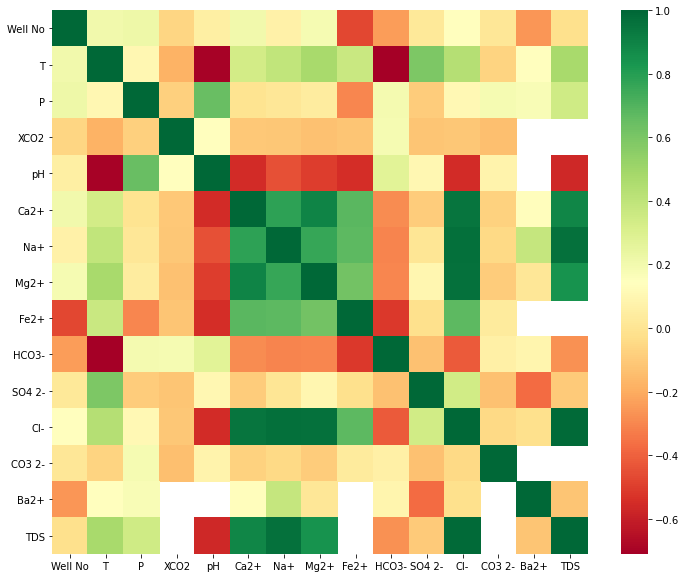

In [ ]:
# Visualize the data correlation on a heatmap

fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(scale_data.corr(), cmap=('RdYlGn'))

The blank spaces on the map show that the variables share no instances (due to null values). For instance, Ba2+ can't be predicted using TDS, pH, Fe2+ o CO3.

Well no is just an indicator of the different wells from which the data was measured. Even though multiple instances were measured from some wells, the variables (note: not values) obtained from each well are the same, therefore any correlation seen is not a relevant relationship for prediction.

Pressure and pH are highly positively correlated, while pressure shows an average negative correlation with Fe2+, this may not imply a real relationship in the PVT relationship of petroleum engineering. Pressure shows no correlation with temperature on the map.

Temperature shows a slight positive correlation with most of the ion concentrations. It also shows a high negative correlation with pH and HCO3-. This makes all these variables suitable for predicting the temperature values.

CO2 mole fraction has a very slight correlation with the other variables and almost no correlation with pH.

pH shows a strong negative correlations with most of the other variables, a strong +ve correlation with pressure and contrary to the opinion of past litera



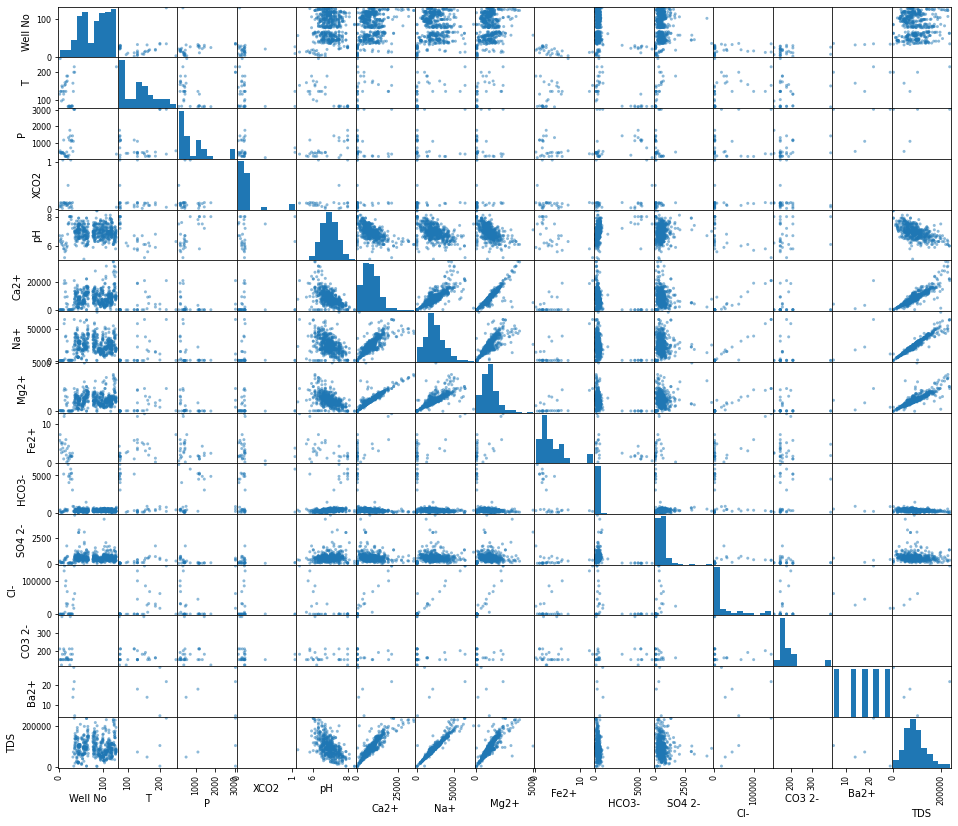

In [ ]:
# A scatter plot betweem the numerical variables

from pandas.plotting import scatter_matrix

scatter_matrix(scale_data, figsize=(16,14));

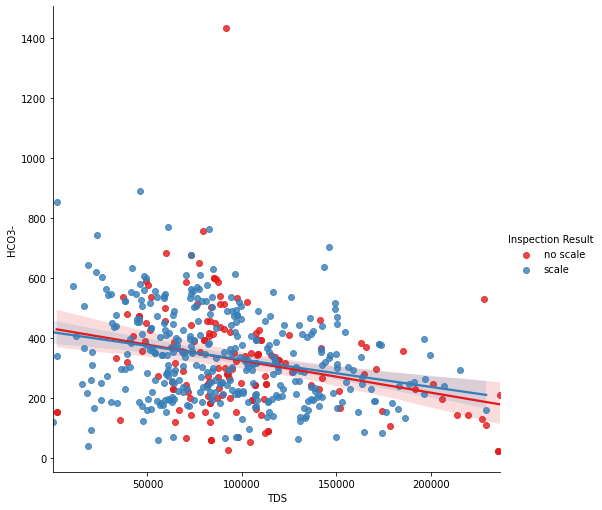

In [ ]:
sns.lmplot(x="TDS", y="HCO3-", hue="Inspection Result", data=scale_data, palette="Set1", height=7)

In [ ]:
# Drop columns that do not appear to be of great importance if any
scale_data.drop('Ba2+', axis=1, inplace=True)

In [ ]:
scale_data.sample(5)

Well No   T   P  XCO2  ...  CO3 2-       TDS  Inspection Result  Scale Type
208       65 NaN NaN   NaN  ...     NaN  164843.0              scale       CaCO3
172       59 NaN NaN   NaN  ...     NaN   84083.0              scale       CaCO3
505      124 NaN NaN   NaN  ...     NaN   89659.0           no scale       CaCO3
123       50 NaN NaN   NaN  ...     NaN   12228.0              scale       CaCO3
57        40 NaN NaN   NaN  ...     NaN   23306.0              scale       CaCO3

[5 rows x 16 columns]

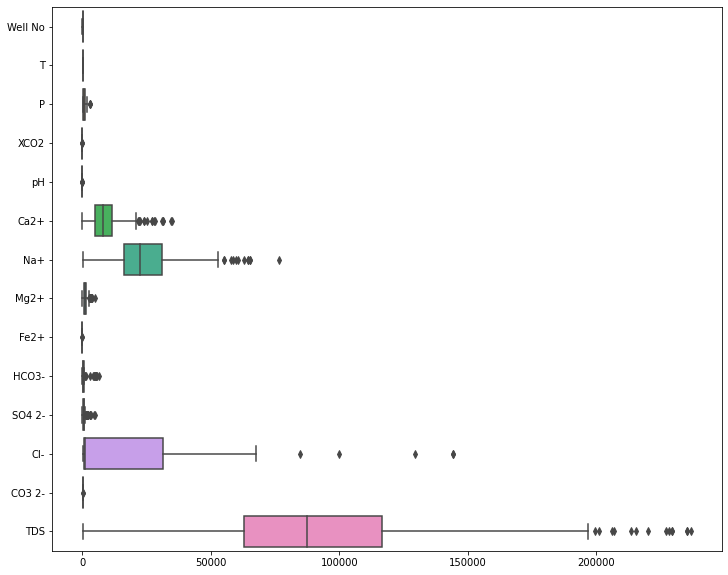

In [ ]:
# Boxplots to check for outliers

fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(data=scale_data, ax=ax, orient='h')

plt.show()

The box plot above shows that the data features fall within different ranges of values. There also a lot of columns with noisy data falling outside the top percentile of the data range. These conditions of the data set call for possible standardization or normalization. This line of action will be considered after building and evaluating a test-run-model with the unstandardized data set. 

In [ ]:
# Encode categorical data
scale_data['Inspection Result'].replace('scale', 1, inplace=True)

In [ ]:
# Encode categorical data
scale_data['Inspection Result'].replace('no scale', 0, inplace=True)

In [ ]:
scale_data['Inspection Result']

0      0
1      1
2      0
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: Inspection Result, Length: 541, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


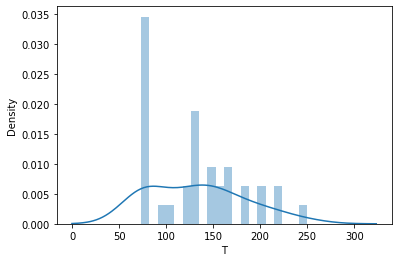

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['T'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


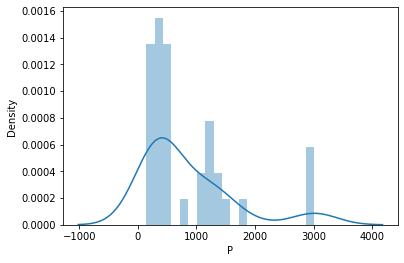

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate


sns.distplot(scale_data['P'], bins=20);


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


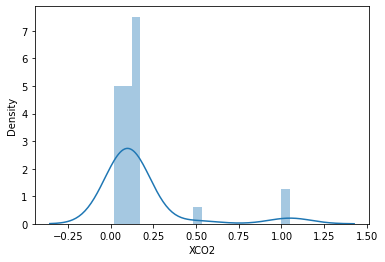

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate


sns.distplot(scale_data['XCO2'], bins=20);


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


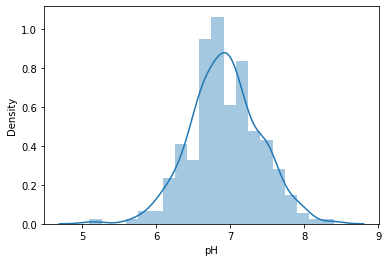

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['pH'],  bins=20);


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


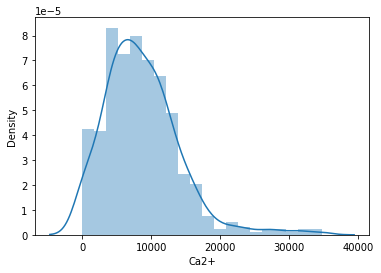

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['Ca2+'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


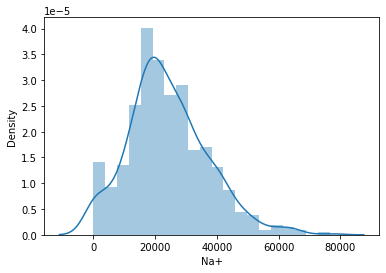

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['Na+'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


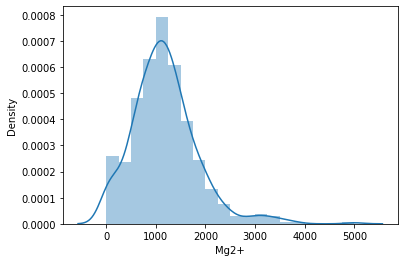

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['Mg2+'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


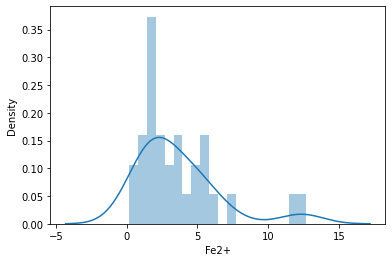

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['Fe2+'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


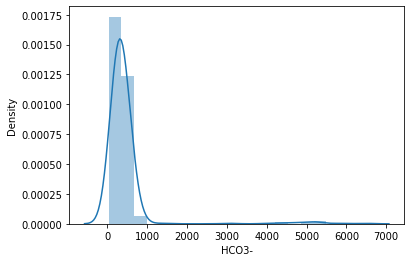

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['HCO3-'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


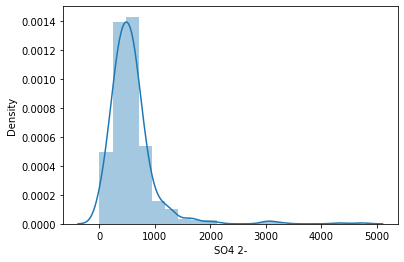

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['SO4 2-'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


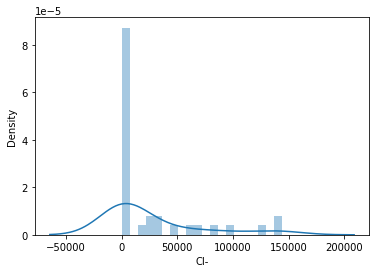

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['Cl-'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


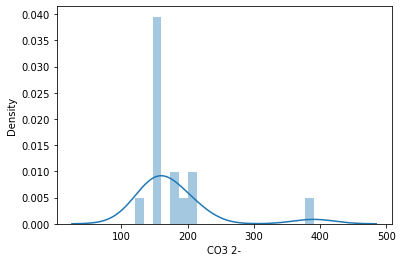

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['CO3 2-'], bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


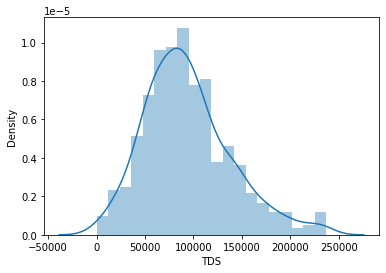

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

sns.distplot(scale_data['TDS'], bins=20);

In [ ]:
scale = sum(scale_data['Inspection Result']==1)
no_scale = sum(scale_data['Inspection Result']==0)

print(scale, no_scale)

367 174


Text(0.5, 1.0, 'Inspection Result')

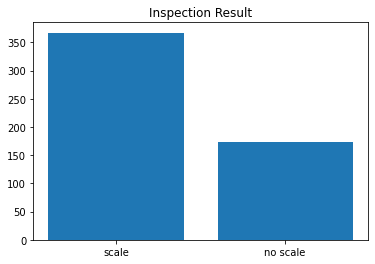

In [ ]:
# Plot to check if distribution is normal
# let's use seaborn to plot the skewness of the data using kernel density estimate

result = ['scale', 'no scale']
sum_of_cases = [scale, no_scale]

plt.bar(result, sum_of_cases);
plt.title('Inspection Result')

In [ ]:
CaCO3 = sum(scale_data['Scale Type']=='CaCO3')
BaSO4 = sum(scale_data['Scale Type']=='BaSO4')

print(CaCO3, BaSO4)

535 5


Text(0.5, 1.0, 'Scale Type')

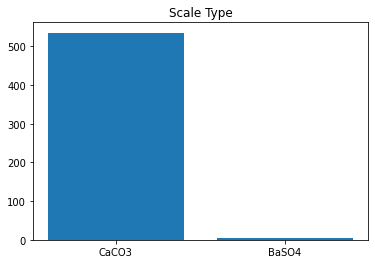

In [ ]:
result = ['CaCO3', 'BaSO4']
sum_of_cases = [CaCO3,  BaSO4]

plt.bar(result, sum_of_cases);
plt.title('Scale Type')

### Filling Null Values

Here 3 methods are experimented for imputing null values. The different data sets will be evaluated by building an experimental model with them and then the highest performing data set will be used for further development.

#### Using datawig to generate null values

In [ ]:
!pip install datawig

     |████████████████████████████████| 61 kB 63 kB/s 
     |████████████████████████████████| 7.0 MB 10.0 MB/s 
     |████████████████████████████████| 10.4 MB 22.7 MB/s 
     |████████████████████████████████| 29.6 MB 36 kB/s 
     |████████████████████████████████| 13.8 MB 114 kB/s 
  Created wheel for datawig: filename=datawig-0.2.0-py3-none-any.whl size=72678 sha256=71af5b0969df834b2b146894d01b801d57a8483fc681720b9db37b5c2ebae5a3
  Stored in directory: /root/.cache/pip/wheels/23/44/aa/12cf6e868f0d71e3c4e57796330094461ade4cb3f1a3acd6c4
Successfully built datawig
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10

In [ ]:
import datawig

##### Temperature Imputation

In [ ]:
# Impute null Temperature data using datawig
from datawig import SimpleImputer

# Split data set
scale_data_train, scale_data_test = datawig.utils.random_split(scale_data, split_ratios=[0.8, 0.2])

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'P', 'XCO2', 'pH', 'Ca2+', 'Na+', 'Mg2+', 'Fe2+',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'TDS', 'Scale Type'], output_column='T', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

In [ ]:
# Predict null T values
imputer.fit(scale_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-1]	Speed: 1171.72 samples/sec	cross-entropy=76.043877	T-accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=76.043877
INFO:root:Epoch[0] Train-T-accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.036
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=195.382355
INFO:root:Epoch[0] Validation-T-accuracy=0.000000
INFO:root:Epoch[1] Batch [0-1]	Speed: 1144.62 samples/sec	cross-entropy=59.731262	T-accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=59.731262
INFO:root:Epoch[1] Train-T-accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.034
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=140.444397
INFO:root:Epoch[1] Validation-T-

In [ ]:
# Check if values were imputed
scale_imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Well No            541 non-null    int64  
 1   T                  36 non-null     float64
 2   P                  36 non-null     float64
 3   XCO2               31 non-null     float64
 4   pH                 535 non-null    float64
 5   Ca2+               541 non-null    float64
 6   Na+                540 non-null    float64
 7   Mg2+               540 non-null    float64
 8   Fe2+               30 non-null     float64
 9   HCO3-              541 non-null    float64
 10  SO4 2-             539 non-null    float64
 11  Cl-                35 non-null     float64
 12  CO3 2-             30 non-null     float64
 13  TDS                510 non-null    float64
 14  Inspection Result  541 non-null    int64  
 15  Scale Type         540 non-null    object 
 16  T_imputed          541 non

In [ ]:
T_imputed = scale_imputed_data['T_imputed']

In [ ]:
# Get Imputed datas samples
scale_data_test_imputed.sample(6, random_state=20)

Well No   T   P  XCO2  ...      TDS  Inspection Result  Scale Type   T_imputed
313       94 NaN NaN   NaN  ...  30782.0                  1       CaCO3  121.171964
165       58 NaN NaN   NaN  ...  65618.0                  1       CaCO3  122.858006
430      113 NaN NaN   NaN  ...  52058.0                  0       CaCO3  122.805193
484      119 NaN NaN   NaN  ...  83278.0                  0       CaCO3  125.179167
491      120 NaN NaN   NaN  ...  35671.0                  0       CaCO3  124.966166
364      101 NaN NaN   NaN  ...  29037.0                  1       CaCO3  122.656907

[6 rows x 17 columns]

In [ ]:
# Using rsquare metrics check the performance of the imputer
# Score the model on the training set, round off the score to 2 decimal places, multiply 100 to get a percentage score
    

# Score the model on the test set, round off the score to 2 decimal places, multiply 100 to get a percentage score
from sklearn.metrics import r2_score

print("The test score for this model is {}".format((r2_score(scale_data_test['T'].dropna(), scale_data_test_imputed['T_imputed'])* 100).round(2) ) + "%")

# Imputer model evaluation
imputed_dw = scale_data_test_imputed[['T', 'T_imputed']]

from sklearn.metrics import  mean_squared_error as mse

dw_rmse = (mse(imputed_dw['T'], imputed_dw['T_imputed']))**0.5

##### Pressure null data imputation

In [ ]:
# Impute null Pressure data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'pH', 'Ca2+', 'Na+', 'Mg2+', 'Fe2+',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'TDS', 'Scale Type'], output_column='P', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

In [ ]:
# Predict null P values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-1]	Speed: 1171.31 samples/sec	cross-entropy=198.807663	P-accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=198.807663
INFO:root:Epoch[0] Train-P-accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.038
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=114.384552
INFO:root:Epoch[0] Validation-P-accuracy=0.000000
INFO:root:Epoch[1] Batch [0-1]	Speed: 1144.97 samples/sec	cross-entropy=165.091370	P-accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=165.091370
INFO:root:Epoch[1] Train-P-accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.036
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=101.837341
INFO:root:Epoch[1] Validatio

In [ ]:
# Check if values were imputed
scale_imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Well No            541 non-null    int64  
 1   T                  36 non-null     float64
 2   P                  36 non-null     float64
 3   XCO2               31 non-null     float64
 4   pH                 535 non-null    float64
 5   Ca2+               541 non-null    float64
 6   Na+                540 non-null    float64
 7   Mg2+               540 non-null    float64
 8   Fe2+               30 non-null     float64
 9   HCO3-              541 non-null    float64
 10  SO4 2-             539 non-null    float64
 11  Cl-                35 non-null     float64
 12  CO3 2-             30 non-null     float64
 13  TDS                510 non-null    float64
 14  Inspection Result  541 non-null    int64  
 15  Scale Type         540 non-null    object 
 16  P_imputed          541 non

In [ ]:
P_imputed = scale_imputed_data['P_imputed']

##### CO2 mole fraction (XCO2) null data imputation

In [ ]:
# Impute null XCO2 data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'P', 'pH', 'Ca2+', 'Na+', 'Mg2+', 'Fe2+',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'TDS', 'Scale Type'], output_column='XCO2', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

In [ ]:
# Predict null XCO2 values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-1]	Speed: 1143.54 samples/sec	cross-entropy=302.138491	XCO2-accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=302.138491
INFO:root:Epoch[0] Train-XCO2-accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.039
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=13.560953
INFO:root:Epoch[0] Validation-XCO2-accuracy=0.000000
INFO:root:Epoch[1] Batch [0-1]	Speed: 1127.88 samples/sec	cross-entropy=292.266296	XCO2-accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=292.266296
INFO:root:Epoch[1] Train-XCO2-accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.037
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=14.816266
INFO:root:Epoch

In [ ]:
XCO2_imputed = scale_imputed_data['XCO2_imputed']

##### pH null data imputation

In [ ]:
# Impute null pH data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'P', 'Ca2+', 'Na+', 'Mg2+', 'Fe2+',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'TDS', 'Scale Type'], output_column='pH', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

In [ ]:
# Predict null pH values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-16]	Speed: 1135.26 samples/sec	cross-entropy=7.916704	pH-accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=7.498191
INFO:root:Epoch[0] Train-pH-accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.441
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=8.416661
INFO:root:Epoch[0] Validation-pH-accuracy=0.000000
INFO:root:Epoch[1] Batch [0-16]	Speed: 1155.70 samples/sec	cross-entropy=7.432952	pH-accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=7.147478
INFO:root:Epoch[1] Train-pH-accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.441
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=8.430323
INFO:root:Epoch[1] Validation-pH-

In [ ]:
pH_imputed = scale_imputed_data['pH_imputed']

##### Fe2+ null data imputation

In [ ]:
# Impute null Fe2+ data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'P', 'Ca2+', 'Na+', 'Mg2+', 'pH',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'TDS', 'Scale Type'], output_column='Fe2+', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

In [ ]:
# Predict null Fe2+ values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-1]	Speed: 1171.53 samples/sec	cross-entropy=61.787258	Fe2+-accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=61.787258
INFO:root:Epoch[0] Train-Fe2+-accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.035
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=113.784447
INFO:root:Epoch[0] Validation-Fe2+-accuracy=0.000000
INFO:root:Epoch[1] Batch [0-1]	Speed: 1030.83 samples/sec	cross-entropy=31.589330	Fe2+-accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=31.589330
INFO:root:Epoch[1] Train-Fe2+-accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.038
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=66.572685
INFO:root:Epoch[1]

In [ ]:
Fe2_imputed = scale_imputed_data['Fe2+_imputed']

 ##### Na+ null data imputation

In [ ]:
# Impute null Na+ data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'P', 'Ca2+', 'Fe2+', 'Mg2+', 'pH',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'TDS', 'Scale Type'], output_column='Na+', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

/usr/local/lib/python3.7/dist-packages/datawig/calibration.py:92: RuntimeWarning: invalid value encountered in log
  return np.log(probas)


In [ ]:
# Predict null Na+ values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-16]	Speed: 1081.15 samples/sec	cross-entropy=1.335629	Na+-accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=1.055801
INFO:root:Epoch[0] Train-Na+-accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.478
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=0.350384
INFO:root:Epoch[0] Validation-Na+-accuracy=0.000000
INFO:root:Epoch[1] Batch [0-16]	Speed: 1126.43 samples/sec	cross-entropy=1.008410	Na+-accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=0.646763
INFO:root:Epoch[1] Train-Na+-accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.448
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=0.431873
INFO:root:Epoch[1] Validatio

In [ ]:
Na_imputed = scale_imputed_data['Na+_imputed']

##### Mg2+ null data imputation

In [ ]:
# Impute null Mg2+ data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'P', 'Ca2+', 'Fe2+', 'Na+', 'pH',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'TDS', 'Scale Type'], output_column='Mg2+', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

/usr/local/lib/python3.7/dist-packages/datawig/calibration.py:92: RuntimeWarning: invalid value encountered in log
  return np.log(probas)


In [ ]:
# Predict null Mg2+ values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-16]	Speed: 1167.42 samples/sec	cross-entropy=1.776713	Mg2+-accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=2.246136
INFO:root:Epoch[0] Train-Mg2+-accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.440
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=3.940439
INFO:root:Epoch[0] Validation-Mg2+-accuracy=0.000000
INFO:root:Epoch[1] Batch [0-16]	Speed: 1149.89 samples/sec	cross-entropy=1.670484	Mg2+-accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=2.061842
INFO:root:Epoch[1] Train-Mg2+-accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.452
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=3.538408
INFO:root:Epoch[1] Vali

In [ ]:
Mg2_imputed = scale_imputed_data['Mg2+_imputed']

##### SO4 2- null data imputation

In [ ]:
# Impute null SO4 2- data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'P', 'Ca2+', 'Fe2+', 'Na+', 'pH',
       'HCO3-', 'Mg2+', 'Cl-', 'CO3 2-', 'TDS', 'Scale Type'], output_column='SO4 2-', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

/usr/local/lib/python3.7/dist-packages/datawig/calibration.py:92: RuntimeWarning: invalid value encountered in log
  return np.log(probas)


In [ ]:
# Predict null SO4 2- values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-16]	Speed: 1176.98 samples/sec	cross-entropy=9.971882	SO4 2--accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=9.367916
INFO:root:Epoch[0] Train-SO4 2--accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.432
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=27.374314
INFO:root:Epoch[0] Validation-SO4 2--accuracy=0.000000
INFO:root:Epoch[1] Batch [0-16]	Speed: 1152.46 samples/sec	cross-entropy=10.878751	SO4 2--accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=10.203362
INFO:root:Epoch[1] Train-SO4 2--accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.461
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=28.585226
INFO:root

In [ ]:
SO4_2_imputed = scale_imputed_data['SO4 2-_imputed']

##### Cl- null data imputation

In [ ]:
# Impute null Cl- data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'P', 'Ca2+', 'Fe2+', 'Na+', 'pH',
       'HCO3-', 'SO4 2-', 'Mg2+', 'CO3 2-', 'TDS', 'Scale Type'], output_column='Cl-', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

/usr/local/lib/python3.7/dist-packages/datawig/calibration.py:92: RuntimeWarning: invalid value encountered in log
  return np.log(probas)


In [ ]:
# Predict null Cl- values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-1]	Speed: 1182.20 samples/sec	cross-entropy=61.877474	Cl--accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=61.877474
INFO:root:Epoch[0] Train-Cl--accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.044
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=46.848690
INFO:root:Epoch[0] Validation-Cl--accuracy=0.000000
INFO:root:Epoch[1] Batch [0-1]	Speed: 1176.83 samples/sec	cross-entropy=41.873396	Cl--accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=41.873396
INFO:root:Epoch[1] Train-Cl--accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.038
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=43.491516
INFO:root:Epoch[1] Valid

In [ ]:
Cl_imputed = scale_imputed_data['Cl-_imputed']

##### CO3 2- null data imputation

In [ ]:
# Impute null CO3 2- data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'P', 'Ca2+', 'Fe2+', 'Na+', 'pH',
       'HCO3-', 'SO4 2-', 'Cl-', 'Mg2+', 'TDS', 'Scale Type'], output_column='CO3 2-', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

In [ ]:
# Predict null CO3 2- values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-1]	Speed: 1106.02 samples/sec	cross-entropy=246.051598	CO3 2--accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=246.051598
INFO:root:Epoch[0] Train-CO3 2--accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.036
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=87.254333
INFO:root:Epoch[0] Validation-CO3 2--accuracy=0.000000
INFO:root:Epoch[1] Batch [0-1]	Speed: 1015.23 samples/sec	cross-entropy=224.207458	CO3 2--accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=224.207458
INFO:root:Epoch[1] Train-CO3 2--accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.038
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=55.345909
INFO:

In [ ]:
CO3_2_imputed = scale_imputed_data['CO3 2-_imputed']

##### TDS null data imputation

In [ ]:
# Impute null TDS data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'P', 'Ca2+', 'Fe2+', 'Na+', 'pH',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'Mg2+', 'Scale Type'], output_column='TDS', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

In [ ]:
# Predict null TDS values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-15]	Speed: 1078.40 samples/sec	cross-entropy=0.320204	TDS-accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=0.302156
INFO:root:Epoch[0] Train-TDS-accuracy=0.000000
INFO:root:Epoch[0] Time cost=0.456
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=0.182021
INFO:root:Epoch[0] Validation-TDS-accuracy=0.000000
INFO:root:Epoch[1] Batch [0-15]	Speed: 1067.45 samples/sec	cross-entropy=1.410118	TDS-accuracy=0.000000
INFO:root:Epoch[1] Train-cross-entropy=1.149034
INFO:root:Epoch[1] Train-TDS-accuracy=0.000000
INFO:root:Epoch[1] Time cost=0.449
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=0.306944
INFO:root:Epoch[1] Validatio

In [ ]:
TDS_imputed = scale_imputed_data['TDS_imputed']

##### Scale Type null data imputation

In [ ]:
# Impute null Scale Type data using datawig
from datawig import SimpleImputer

# Initialize a simpleImputer model 
imputer = SimpleImputer(input_columns=['Well No', 'T', 'XCO2', 'P', 'Ca2+', 'Fe2+', 'Na+', 'pH',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'TDS', 'Mg2+'], output_column='Scale Type', output_path = 'imputer_model')

imputer.fit(train_df=scale_data_train)


scale_data_test_imputed = imputer.predict(scale_data_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4213: FutureWarning: 'is_extension_type' is deprecated and will be removed in a future version.  Use 'is_extension_array_dtype' instead.
  if callable(index) or is_dict_like(index):
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4213: FutureWarning: 'is_extension_type' is deprecated and will be removed in a future version.  Use 'is_extension_array_dtype' instead.
  if callable(index) or is_dict_like(index):
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and bein

In [ ]:
# Predict null Scale Type values
imputer.fit(scale_imputed_data)

scale_imputed_data = imputer.predict(scale_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4213: FutureWarning: 'is_extension_type' is deprecated and will be removed in a future version.  Use 'is_extension_array_dtype' instead.
  if callable(index) or is_dict_like(index):
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4213: FutureWarning: 'is_extension_type' is deprecated and will be removed in a future version.  Use 'is_extension_array_dtype' instead.
  if callable(index) or is_dict_like(index):
/usr/local/lib/python3.7/dist-packages/mxnet/module/base_module.py:503: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
INFO:root:Epoch[0] Batch [0-16]	Speed: 12576.62 samples/sec	cross-entropy=0.013498	Scale Type-accuracy=0.996324
INFO:root:Epoch[0] Train-cross-entropy=0.008373
INFO:root:Epoch[0] Train-Scale Type-accuracy=0.997984
INFO:root:Epoch[0] Time cost=0.045
INFO:root:Saved checkpoint to "imputer_model/mo

In [ ]:
Scale_Type_imputed = scale_imputed_data['Scale Type_imputed']

##### Imputed data set

In [ ]:
scale_imputed_data = {'Well No': scale_data['Well No'], 'T': T_imputed, 'P': P_imputed, 'XCO2': XCO2_imputed, 'pH': pH_imputed, 'Ca2+': scale_data['Ca2+'], 'Na+': Na_imputed,
                      'Mg2+': Mg2_imputed, 'Fe2+': Fe2_imputed, 'HCO3-': scale_data['HCO3-'], 'SO4 2-': SO4_2_imputed, 'Cl-': Cl_imputed,
                      'CO3 2-': CO3_2_imputed, 'TDS': TDS_imputed, 'Inspection Result': scale_data['Inspection Result'],
       'Scale Type': Scale_Type_imputed}

In [ ]:
scale_imputed_data = pd.DataFrame(data=scale_imputed_data)

In [ ]:
scale_imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Well No            541 non-null    int64  
 1   T                  541 non-null    float64
 2   P                  541 non-null    float64
 3   XCO2               541 non-null    float64
 4   pH                 541 non-null    float64
 5   Ca2+               541 non-null    float64
 6   Na+                541 non-null    float64
 7   Mg2+               541 non-null    float64
 8   Fe2+               541 non-null    float64
 9   HCO3-              541 non-null    float64
 10  SO4 2-             541 non-null    float64
 11  Cl-                541 non-null    float64
 12  CO3 2-             541 non-null    float64
 13  TDS                541 non-null    float64
 14  Inspection Result  541 non-null    int64  
 15  Scale Type         541 non-null    object 
dtypes: float64(13), int64(2), 

#### Average data imputed

In [ ]:
scale_averaged_data = pd.DataFrame(scale_data.fillna(scale_data.mean()))

scale_averaged_data.sample(7)

Well No           T           P  ...       TDS  Inspection Result  Scale Type
229       78  132.277778  849.976389  ...   73744.0                  1       CaCO3
73        42  132.277778  849.976389  ...  122515.0                  1       CaCO3
352      100  132.277778  849.976389  ...   48424.0                  1       CaCO3
86        44  132.277778  849.976389  ...  107631.0                  1       CaCO3
470      119  132.277778  849.976389  ...  107205.0                  0       CaCO3
77        43  132.277778  849.976389  ...   20070.0                  1       CaCO3
297       91  132.277778  849.976389  ...   68781.0                  1       CaCO3

[7 rows x 16 columns]

In [ ]:
scale_averaged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Well No            541 non-null    int64  
 1   T                  541 non-null    float64
 2   P                  541 non-null    float64
 3   XCO2               541 non-null    float64
 4   pH                 541 non-null    float64
 5   Ca2+               541 non-null    float64
 6   Na+                541 non-null    float64
 7   Mg2+               541 non-null    float64
 8   Fe2+               541 non-null    float64
 9   HCO3-              541 non-null    float64
 10  SO4 2-             541 non-null    float64
 11  Cl-                541 non-null    float64
 12  CO3 2-             541 non-null    float64
 13  TDS                541 non-null    float64
 14  Inspection Result  541 non-null    int64  
 15  Scale Type         540 non-null    object 
dtypes: float64(13), int64(2), 

#### Zero Imputed Data

In [ ]:

scale_data_zeroed = scale_data.fillna(0)

scale_data_zeroed.sample(7)

Well No      T       P  ...       TDS  Inspection Result  Scale Type
31        32  130.0  1115.0  ...   70988.0                  1       BaSO4
413      110    0.0     0.0  ...   76280.0                  1       CaCO3
536      129    0.0     0.0  ...   81271.0                  0       CaCO3
151       56    0.0     0.0  ...   82112.0                  1       CaCO3
197       64    0.0     0.0  ...  149240.0                  1       CaCO3
99        45    0.0     0.0  ...   94346.0                  1       CaCO3
203       65    0.0     0.0  ...  176274.0                  1       CaCO3

[7 rows x 16 columns]

In [ ]:
scale_data_zeroed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Well No            541 non-null    int64  
 1   T                  541 non-null    float64
 2   P                  541 non-null    float64
 3   XCO2               541 non-null    float64
 4   pH                 541 non-null    float64
 5   Ca2+               541 non-null    float64
 6   Na+                541 non-null    float64
 7   Mg2+               541 non-null    float64
 8   Fe2+               541 non-null    float64
 9   HCO3-              541 non-null    float64
 10  SO4 2-             541 non-null    float64
 11  Cl-                541 non-null    float64
 12  CO3 2-             541 non-null    float64
 13  TDS                541 non-null    float64
 14  Inspection Result  541 non-null    int64  
 15  Scale Type         541 non-null    object 
dtypes: float64(13), int64(2), 

#### New Data Set Visualization

The new data sets are visualized to see if the data behaviour is similar to the original data set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


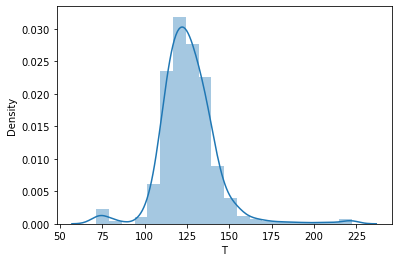

In [ ]:
# Plot to check scale_imputed_data T column distribution

sns.distplot(scale_imputed_data['T'], bins=20);

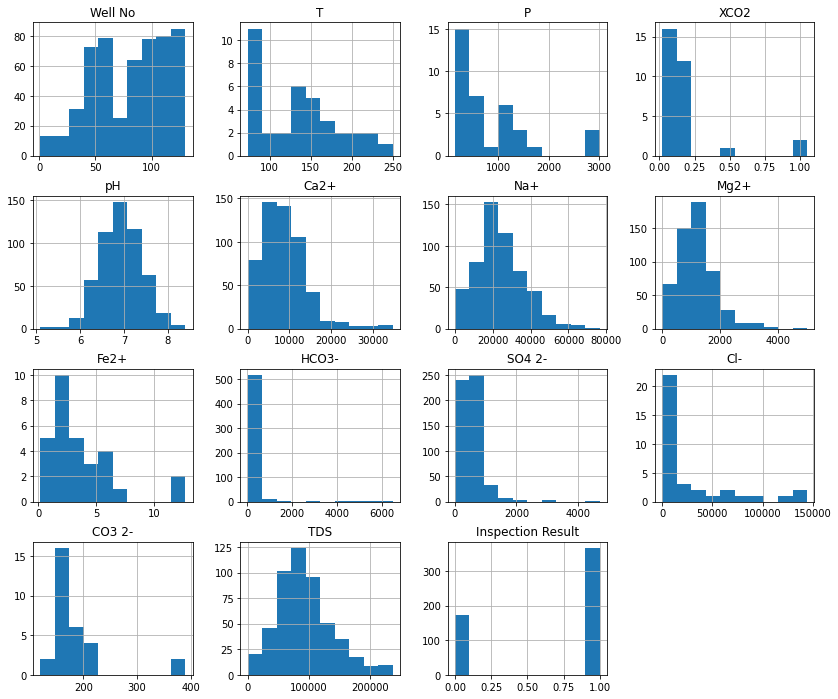

In [ ]:
# Original data set distribution
scale_data.hist(figsize=(14, 12));

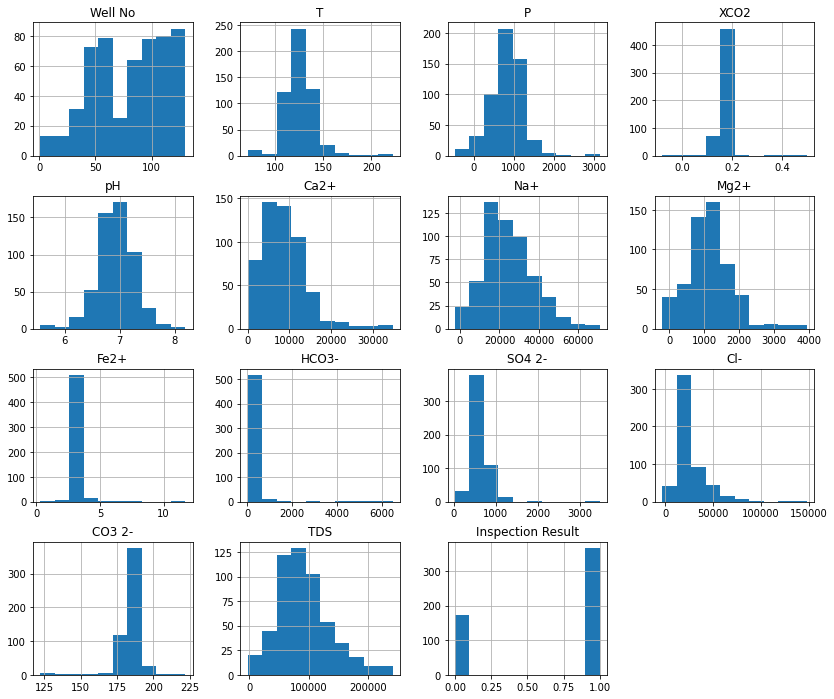

In [ ]:
# Plotting to check the disparity or similarity between the original data set and the imputed data set
scale_imputed_data.hist(figsize=(14,12));

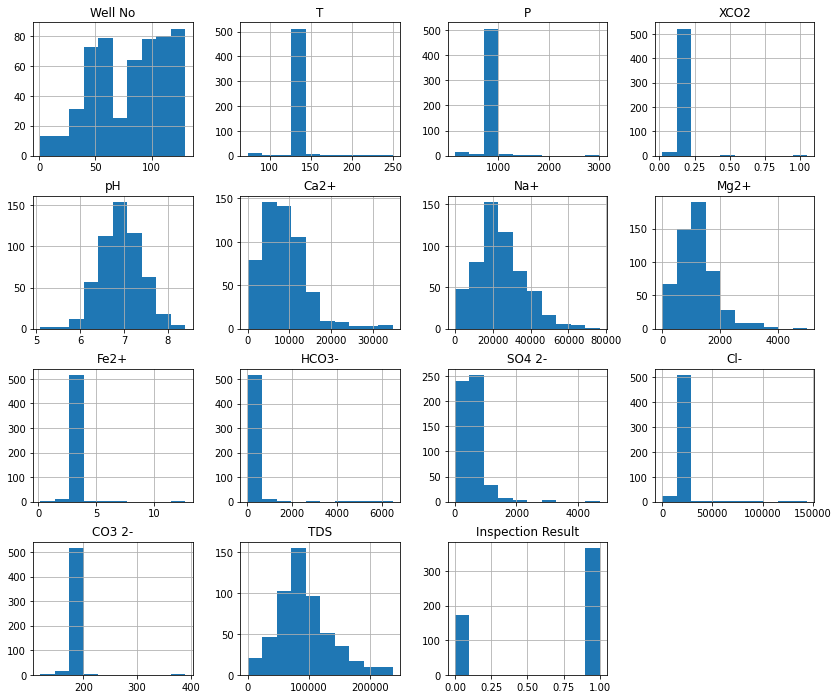

In [ ]:
# Plotting to check the disparity or similarity between the original data set and the data set where averages replaced nulls
scale_averaged_data.hist(figsize=(14,12));

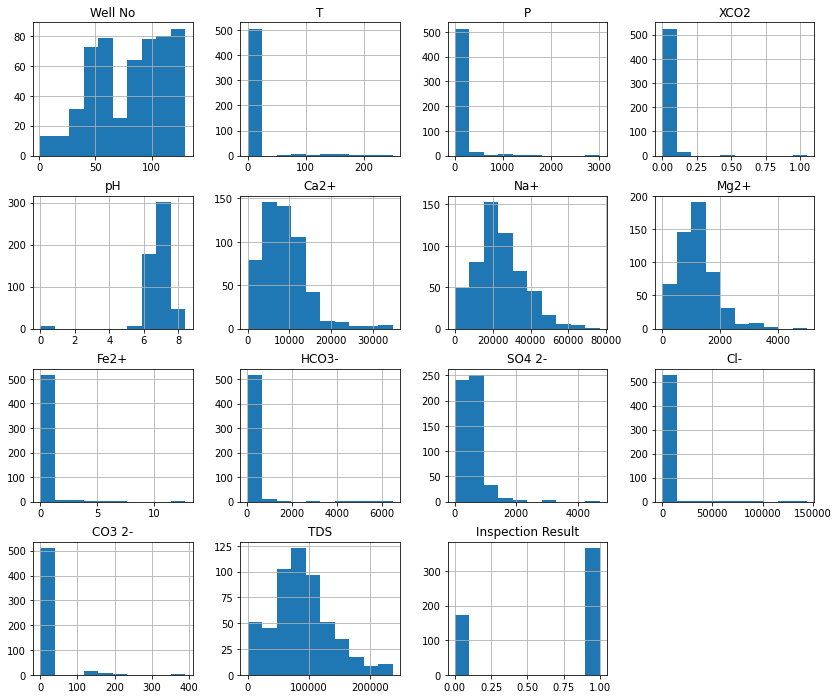

In [ ]:
# Plotting to check the disparity or similarity between the original data set and the data set where zeros replaced nulls
scale_data_zeroed.hist(figsize=(14,12));

## Model Building

##### Chooosing the right metrics for evaluation

For evaluating the performance of our models to determine how correctly it classifies the occurence of scale or not, we will refer to `scale` (1) as the positive outcome and `no scale` (0) as the negative outcome.

scale = positive outcome
no scale = negative outcome

*insert confusion matrix"

**The AUC - ROC curve**
The Reciever Operating Characteristic curve, ROC curve is a plot of the model's 'Recall' versus the model's 'False Positive Rate'. This type of metric indicates the probability of model classifying a proportion of possitve values corrrectly and classifying also a proportion the negative values correctly.
  **Recall** : The fraction of positves correctly classified in the all the data positives. Mathematically:
      Recall = TP / (TP + FN)
    A high recall is desirable.

  **False Positive Rate**: The FPR is the proportion of negatives that are falsely as classified positives among the True negatives and palse positives (i.e. total negatives in the data set). 
      FPR = FP/(TN + FP) 
    A low FPR is desirable.

A plot of Recall Versus FPR gives the ROC Curve below.

*insert ROC curve"

The best performing model is the one nearest to the top left corner of the plot (high Recall and Low False Positive Rates)

This evaluation metric was chosen to evaluate the models built in this research for two major reasons:
1. **Relevance to research problem**: the efficiency of the model and the expected advantage of applying it . Correctly predicted scale appearance enables fast proactive response which saves cost. Falsely classified scale apperances that eventually occur will be costly, In this case a high recall will achieve this aim.
If no scale situations are falsely classified as scale, the company's resources are wasted, so very low false positives (FPR) shows a good performance.

2. **Data imbalance**: The ROC curve metric gives the rates in fractions that are not dependent on the data population size for the different outcomes. This means that:
Recall gives a fraction of TP as a ratio of the total population of positives in the data set. Whether the data set is balanced or not, this fraction will be the same. It works the same way with the FPR its denominator implies that it is dependent on only the negative values of the data set. The data set used for model building in this research having more positive outcomes will not be biasedly evaluated by these fractions.   


**AUC** is the area under an ROC curve calculated for a model. Its values ranges from 0 to 1 as the ROC curve is a plot of probabilities. A model with 0.5 as AUC_score is a random performing model, it gives the right or wrong answers at random. The closer the AUC_score to 1, the better the model's performances. The final model picked from the 4 models experimented was evaluated based on its ROC curve and AUC_score using the criteria mentioned above.

*analyze the output of comparing the ROC curves and the AUC curves"

In [ ]:
# Import performance metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc

# Train_test_split for 
from sklearn.model_selection import train_test_split

scale_data.columns

roc_auc_score(y, model.predict_proba(X)[:, 1])

roc_auc_score(y, model.decision_function(X))

Dropped Scale Type column because

In [ ]:
# Function for model building and evaluation

def build_model(model, dataset):

  # Splitting data for training and testing
  feature_col = ['T', 'P', 'XCO2', 'pH', 'Ca2+', 'Na+', 'Mg2+', 'Fe2+',
       'HCO3-', 'SO4 2-', 'Cl-', 'CO3 2-', 'TDS']
  target_col = 'Inspection Result'

  X = dataset[feature_col]
  y = dataset[target_col]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

  # Fit training data
  model.fit(X_train, y_train)

  # Make prediction
  y_score = model.predict_proba(X_test)[:, 1]

  # Evaluate model using ROC curve and AUC_score

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_score)

  # auc_score
  roc_auc = auc(fpr, tpr)


  # AUC_score for training and test data 

  print('Model training auc_score: {}'.format(roc_auc))
  print('Model test auc_score: {}'.format(roc_auc))

  # Plot the ROC curve for the model


  return {'auc_score': roc_auc, 
          'fpr': fpr,
          'tpr': tpr,
          'threshold': thresholds,
          'y_score': y_score,
          'y_test': y_test
          }

In [ ]:
# Instantiate an evaluation dictionary for test and training scores
model_dic = {}

In [ ]:
# A function for comparing the performance of the different models

def performance_score():
  """
  This function consists of a for loop that iterates over the dictionary: model_dic 
  to print out model name and evaluation scores.
    
  """
  for key in model_dic:
    # Print model name
    print('Model:', key )
        
    # Print model training score
    print('Test AUC score: {}'.format((model_dic[key]['auc_score']).round(2)))
        
        
    print('\n') 
  print()

    # Plot ROC_curve for all the models on one graph

##### SVM Classifier

In [ ]:
from sklearn.svm import SVC

# Instantiate model
scale_SVC_model = SVC(kernel='linear', probability=True,
                                 random_state=0)

model_dic['SVC model (averaged)'] = build_model(model=scale_SVC_model, dataset=scale_averaged_data)

Model training auc_score: 0.8064382654750083
Model test auc_score: 0.8064382654750083


In [ ]:
# SVC algorithm training on imputed data set
model_dic['SVC model (imputed)'] = build_model(model=scale_SVC_model, dataset=scale_imputed_data)

Model training auc_score: 0.7826050976497849
Model test auc_score: 0.7826050976497849


In [ ]:
# SVC algorithm training on data set where zeros replace nulls
model_dic['SVC model (zeroed)'] = build_model(model=scale_SVC_model, dataset=scale_data_zeroed)

Model training auc_score: 0.18809996689837805
Model test auc_score: 0.18809996689837805


In [ ]:
performance_score()

Model: SVC model (averaged)
Test AUC score: 0.81


Model: SVC model (imputed)
Test AUC score: 0.78


Model: SVC model (zeroed)
Test AUC score: 0.19





##### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

scale_logistic = LogisticRegression()

# Logistic algorithm trained on data set of null replaced with averages
model_dic['Logistic Regression Model (averaged) '] = build_model(model=scale_logistic, dataset=scale_averaged_data)

Model training auc_score: 0.8488083416087387
Model test auc_score: 0.8488083416087387


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model_dic['Logistic Regression Model (averaged) ']['threshold']

array([2.00000000e+00, 9.99999997e-01, 9.97445523e-01, 9.93939800e-01,
       9.92419553e-01, 9.78702823e-01, 9.78209608e-01, 9.61058726e-01,
       9.59850605e-01, 9.42086337e-01, 9.32265862e-01, 8.87459905e-01,
       8.86320991e-01, 8.72212857e-01, 8.68534318e-01, 8.03273084e-01,
       7.98002434e-01, 7.91184321e-01, 7.88778183e-01, 7.30840741e-01,
       7.27102788e-01, 6.05362388e-01, 5.99906192e-01, 5.99864744e-01,
       5.68227435e-01, 5.65263765e-01, 5.41541698e-01, 5.40337755e-01,
       5.22565040e-01, 5.05001867e-01, 4.82040839e-01, 4.69505259e-01,
       4.60603052e-01, 4.53866319e-01, 4.16236031e-01, 4.15000578e-01,
       4.12159443e-01, 3.90479777e-01, 3.03365678e-01, 2.79342846e-01,
       1.55159862e-01, 1.40896791e-01, 2.72336297e-02, 1.98517848e-02,
       2.74327585e-04])

In [ ]:
# Logistic algorithm trained on imputed data set
model_dic['Logistic Regression Model (imputed)'] = build_model(model=scale_logistic, dataset=scale_imputed_data)

Model training auc_score: 0.7822740814299901
Model test auc_score: 0.7822740814299901


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Logistic algorithm trained on data set of null replaced with zeros
model_dic['Logistic Regression Model (zeroed)'] = build_model(model=scale_logistic, dataset=scale_data_zeroed)

Model training auc_score: 0.695878848063555
Model test auc_score: 0.695878848063555


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### Decision  Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Instantiate model
scale_Decision_Tree = DecisionTreeClassifier(random_state=20)

# Decision Tree algorithm trained on data set with null values replaced by averages
model_dic['Decision Tree Model (averaged)'] = build_model(model=scale_Decision_Tree, dataset=scale_averaged_data)


Model training auc_score: 0.9102946044356174
Model test auc_score: 0.9102946044356174


In [ ]:
model_dic['Decision Tree Model (averaged)']['threshold']

array([2. , 1. , 0.5, 0. ])

In [ ]:
# Decision Tree algorithm trained on inputed data set
model_dic['Decision Tree Model (zeroed)'] = build_model(model=scale_Decision_Tree, dataset=scale_data_zeroed)

Model training auc_score: 0.8732207878186031
Model test auc_score: 0.8732207878186031


In [ ]:
# Decision Tree algorithm trained on data set with null values replaced by zeros
model_dic['Decision Tree Model (imputed)'] = build_model(model=scale_Decision_Tree, dataset=scale_imputed_data)

Model training auc_score: 0.8831512744124461
Model test auc_score: 0.8831512744124461


In [ ]:
performance_score()

Model: SVC model (averaged)
Test AUC score: 0.81


Model: SVC model (imputed)
Test AUC score: 0.78


Model: SVC model (zeroed)
Test AUC score: 0.19


Model: Logistic Regression Model (averaged) 
Test AUC score: 0.85


Model: Logistic Regression Model (imputed)
Test AUC score: 0.78


Model: Logistic Regression Model (zeroed)
Test AUC score: 0.7


Model: Decision Tree Model (averaged)
Test AUC score: 0.91


Model: Decision Tree Model (zeroed)
Test AUC score: 0.87


Model: Decision Tree Model (imputed)
Test AUC score: 0.88





##### Predicted Result Visualization

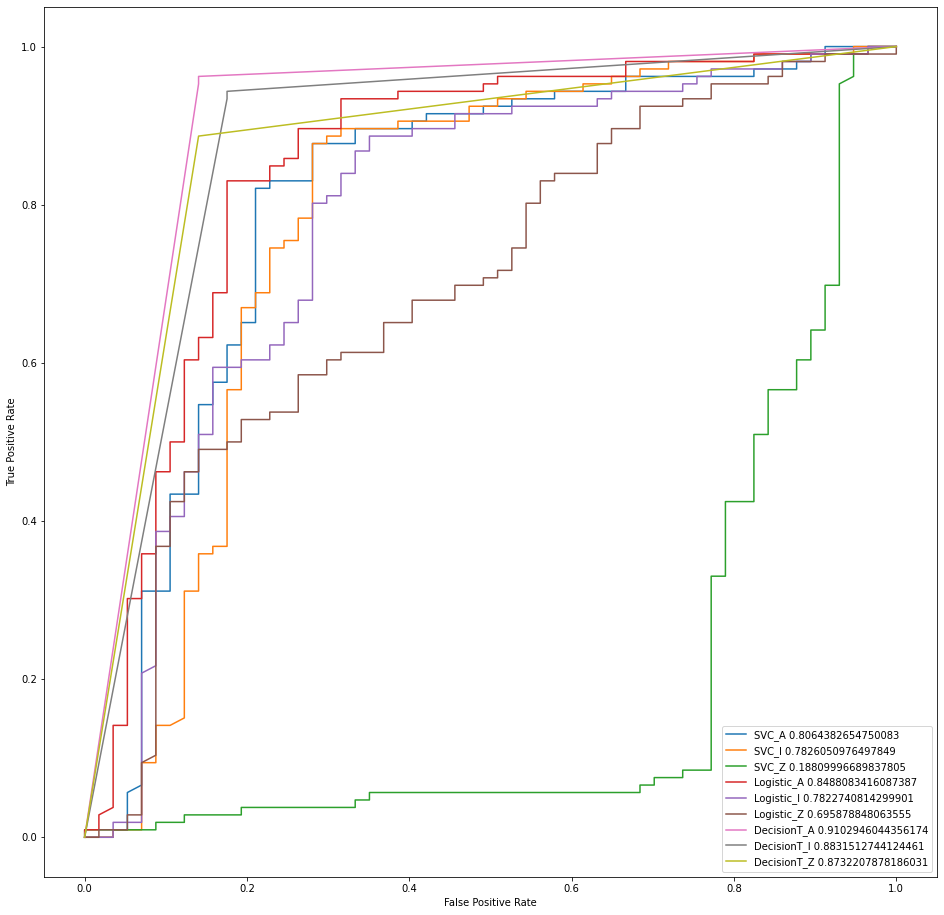

In [ ]:
# Plot ROC for all the models
plt.subplots(figsize=(16,16))
plt.plot(model_dic['SVC model (averaged)']['fpr'], model_dic['SVC model (averaged)']['tpr'], linestyle='-', label = 'SVC_A {}'.format(model_dic['SVC model (averaged)']['auc_score']))
plt.plot(model_dic['SVC model (imputed)']['fpr'], model_dic['SVC model (imputed)']['tpr'], linestyle='-', label = 'SVC_I {}'.format(model_dic['SVC model (imputed)']['auc_score']))
plt.plot(model_dic['SVC model (zeroed)']['fpr'], model_dic['SVC model (zeroed)']['tpr'], linestyle='-', label = 'SVC_Z {}'.format(model_dic['SVC model (zeroed)']['auc_score']))
plt.plot(model_dic['Logistic Regression Model (averaged) ']['fpr'], model_dic['Logistic Regression Model (averaged) ']['tpr'], linestyle='-', label = 'Logistic_A {}'.format(model_dic['Logistic Regression Model (averaged) ']['auc_score']))
plt.plot(model_dic['Logistic Regression Model (imputed)']['fpr'], model_dic['Logistic Regression Model (imputed)']['tpr'], linestyle='-', label = 'Logistic_I {}'.format(model_dic['Logistic Regression Model (imputed)']['auc_score']))
plt.plot(model_dic['Logistic Regression Model (zeroed)']['fpr'], model_dic['Logistic Regression Model (zeroed)']['tpr'], linestyle='-', label = 'Logistic_Z {}'.format(model_dic['Logistic Regression Model (zeroed)']['auc_score']))
plt.plot(model_dic['Decision Tree Model (averaged)']['fpr'], model_dic['Decision Tree Model (averaged)']['tpr'], linestyle='-', label = 'DecisionT_A {}'.format(model_dic['Decision Tree Model (averaged)']['auc_score']))
plt.plot(model_dic['Decision Tree Model (imputed)']['fpr'], model_dic['Decision Tree Model (imputed)']['tpr'], linestyle='-', label = 'DecisionT_I {}'.format(model_dic['Decision Tree Model (imputed)']['auc_score']))
plt.plot(model_dic['Decision Tree Model (zeroed)']['fpr'], model_dic['Decision Tree Model (zeroed)']['tpr'], linestyle='-', label = 'DecisionT_Z {}'.format(model_dic['Decision Tree Model (zeroed)']['auc_score']))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()

### Table containing all predicted results

In [ ]:
prediction_results = pd.DataFrame(data={'Inspection Result': model_dic['Decision Tree Model (averaged)']['y_test'] ,'SVC model prediction': model_dic['SVC model (averaged)']['y_score'] , 'Logistic model prediction': model_dic['Logistic Regression Model (averaged) ']['y_score'], 'DecisionTree model prediction': model_dic['Decision Tree Model (averaged)']['y_score']})

In [ ]:
tablename = prediction_results.head(10)
tablename

Inspection Result  ...  DecisionTree model prediction
74                   1  ...                            1.0
457                  0  ...                            0.0
320                  1  ...                            1.0
387                  1  ...                            1.0
327                  1  ...                            1.0
353                  1  ...                            1.0
276                  1  ...                            1.0
536                  0  ...                            0.0
30                   1  ...                            1.0
230                  1  ...                            1.0

[10 rows x 4 columns]